### Предобработка данных

In [28]:
# Загружаем необходимые библиотеки

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Снимаем ограничение на ширину столбцов

pd.set_option('display.max_colwidth', False)

In [29]:
# Читаем данные

try:
    hypothesis = pd.read_csv("/datasets/hypothesis.csv")
    orders = pd.read_csv("/datasets/orders.csv")
    visitors = pd.read_csv("/datasets/visitors.csv")
except:
    hypothesis, orders, visitors = (
    pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )

In [30]:
# Выведем основную информацию

def data_info(name_dataset):
    display(name_dataset.info())
    display(name_dataset.head())

nm = ['HYPOTHESIS', 'ORDERS', 'VISITORS']
i=0
for ds in [hypothesis, orders, visitors]:
    print('++++++++++++++ < {0} > +++++++++++++++'.format(nm[i]))
    i+=1
    print()
    data_info(ds)
    print()

++++++++++++++ < HYPOTHESIS > +++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



++++++++++++++ < ORDERS > +++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



++++++++++++++ < VISITORS > +++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В таблице hypothesis девять гипотез. Пропусков в данных не обнаружено. Требуется поправить названия столбцов.  
В таблицах с заказами и посетителям пользователи поделены на две группы (А и В). Пропусков в этих таблицах также не обнаружено.  
Требует изменения тип данных столбец с датами в обеих таблицах.

In [31]:
# Преобразуем названия колонок hypothesis в нижний регистр

hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [32]:
# Преобразуем столбец date в таблицах orders и visitors в формат datetime

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [33]:
# Проверим диапазон значений в таблице hypothesis

hypothesis[['reach','impact','confidence','efforts']].describe().loc[['count', 'min', 'max']]

,reach,impact,confidence,efforts
count,9.0,9.0,9.0,9.0
min,1.0,1.0,1.0,1.0
max,10.0,10.0,9.0,10.0


In [34]:
# Проверим диапазон значений в таблице visitors

visitors.describe().loc[['count', 'min', 'max']]

,date,visitors
count,62,62.0
min,2019-08-01 00:00:00,361.0
max,2019-08-31 00:00:00,770.0


In [35]:
# Проверим диапазон значений в таблице orders

orders.describe().loc[['count', 'min', 'max']]

,transactionId,visitorId,date,revenue
count,1.197000e+03,1.197000e+03,1197,1197.0
min,1.062393e+06,5.114589e+06,2019-08-01 00:00:00,50.0
max,4.293856e+09,4.283872e+09,2019-08-31 00:00:00,1294500.0


Наблюдается аномально высокая цена заказа. Посмотрим на стоимость остальных дорогих заказов.

In [36]:
# Отобразим топ-5 самых дорогих заказов

orders.sort_values('revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Есть один заказ с аномально высокой стоимостью. Удалим заказ стоимостью в 1294500 из дальнейшего анализа. Такая огромная сумма - единственная и будет искажать результат.

In [37]:
orders = orders[orders['transactionId'] != 590470918]
orders.sort_values('revenue', ascending = False).head()

,transactionId,visitorId,date,revenue,group
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
662,1811671147,4266935830,2019-08-29,78990,A


In [38]:
# Поиск дубликатов в hypothesis, orders, visitors

print("Количество дубликатов в 'hypothesis':", hypothesis.duplicated().sum())
print("Количество дубликатов в 'orders':", orders.duplicated().sum())
print("Количество дубликатов в 'visitors':", visitors.duplicated().sum())

Количество дубликатов в 'hypothesis': 0
Количество дубликатов в 'orders': 0
Количество дубликатов в 'visitors': 0


In [39]:
# Проверим уникальность групп в таблицах с заказами и пользователями

display(orders.group.unique())
visitors.group.unique()

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

In [40]:
# Проверим диапазон дат в таблице оrders

orders['date'].describe().loc[['min', 'max']]

min    2019-08-01 00:00:00
max    2019-08-31 00:00:00
Name: date, dtype: object

In [41]:
# Проверим диапазон дат в таблице visitors

visitors['date'].describe().loc[['min', 'max']]

min    2019-08-01 00:00:00
max    2019-08-31 00:00:00
Name: date, dtype: object

In [42]:
# В таблице orders проверим, есть ли пользователи присутствующие в обеих группах

duplicates = orders[orders.duplicated('visitorId', keep=False)]['visitorId']
result = orders[orders['visitorId'].isin(duplicates)].groupby('visitorId')['group'].nunique()
result = result[result > 1]
result.count()

58

In [43]:
# Количество ошибочных visitorId от общего числа

"{0:.1%}".format(result.count()/orders.visitorId.nunique())

'5.6%'

Произошло некорректное деление пользователей на группы на этапе подготовки A/B-теста. У нас 58 пользователей, которые присутствуют в обеих группах. Это составляет 5.6% от общего числа пользователей. Т.к. эта группа может сильно искажать результат исследование принято решение удалить таких пользователей из таблицы orders.

In [44]:
# Удалим некорректные visitorId из таблицы orders
orders = orders[~orders['visitorId'].isin(result.index)]

# Всего уникальных пользоватлей
orders['visitorId'].nunique()

972

In [45]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1015 non-null   int64         
 1   visitorId      1015 non-null   int64         
 2   date           1015 non-null   datetime64[ns]
 3   revenue        1015 non-null   int64         
 4   group          1015 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [46]:
# Измерим количество пользователй в каждой группе

ag = orders.query('group == "A"')['visitorId'].nunique()

bg = orders.query('group == "B"')['visitorId'].nunique()

print(f'Количество пользователей в группе А: {ag}')

print(f'Количество пользователей в группе В: {bg}')

print(f'соотношение количества пользователей в группах: {"{0:.1%}".format((bg-ag) / ag)}')

Количество пользователей в группе А: 445
Количество пользователей в группе В: 527
соотношение количества пользователей в группах: 18.4%


Пользователей в группе В на 18.4% больше, чем в группе А. Это внесёт дополнительные искажения на результат анализа.

Таким образом, в результате предварительного изучения данных:
- изменены названия колонок в таблице с гипотезами в нижний регистр;
- типы данных в колонках с датами были преобразованы в формат datetime; 
- найдена аномальна высокая цена одного заказа, которая была удалена;
- пропусков и дубликатов в данных обнаружено не было;
- приоритизации требуют девять гипотез;
- для целей теста пользователи поделены на две группы: A и B;
- параметры reach, impact, efforts для расчёта приоритизации имеют шкалу от 1 до 10, а параметр confidence от 1 до 9;
- количество уникальных пользователей: 972;
- дата проведения теста: 2019-08-01 - 2019-08-31;
- удалены пользователи присутствующие в обеих группах, что составило 5.6% от общего числа;
- пользователей в группе В на 18.4% больше, чем в группе А.

### Часть 1. Приоритизация гипотез

Для расчёта приоритизации гипотез воспользуемся фреймворками ICE и RICE. Для этого нам понадобятся следующие параметры:

`Reach` — охват, скольких пользователей затронет изменение, которое вы хотите внести;

`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так;

`Efforts` — сколько стоит протестировать эту гипотезу.

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [47]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].astype('int')
hypothesis.sort_values('ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1


С точки зрения метода ICE наиболее перспективными оказываются гипотезы: 8, 0, 7, 6. Лидером становится гипотеза: "Запустить акцию, дающую скидку на товар в день рождения"

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [48]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['RICE'] = hypothesis['RICE'].astype('int')
hypothesis.sort_values('RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


В соответствии с методом RICE cамыми перспективными гипотезами оказались: 7, 2, 0, 6. В отличие от ICE метода, где на первом месте гипотеза под номером 8, здесь лидирует гипотеза под номером 7 благодаря параметру reach, достигающий 10. Этот параметр помимо остальных учитывает, как много пользователей затрагивают предложенные в гипотезе изменения. Лидером приоритизации становится гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Часть 2. Анализ A/B-теста

Чтобы построить графики, нужно собрать кумулятивные данные о посетителях и о заказах по дням. 

In [49]:
# Создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [50]:
# Соберём агрегированные кумулятивные данные о заказах по дням

ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'})
                    , axis=1)
                    .sort_values(by=['date','group']))
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [51]:
# Соберём агрегированные кумулятивные данные о посетителях по дням

visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объявим датафрейм `cumulativeData` со столбцами:
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [52]:
# Объединим кумулятивные данные в одной таблице

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### 1. Построим графики кумулятивной выручки по группам

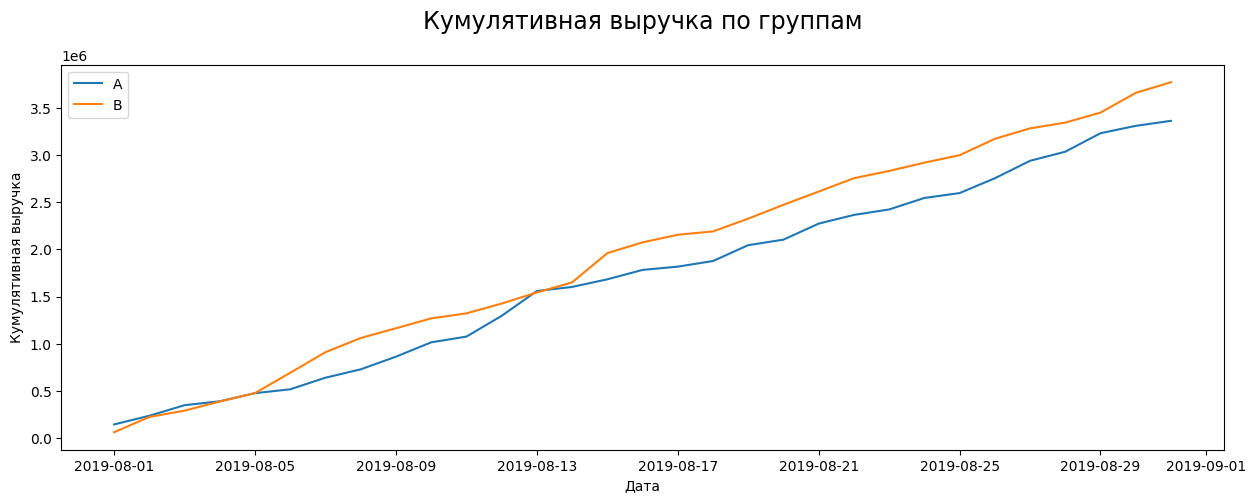

In [53]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xlabel('Дата', fontsize=10)
plt.ylabel('Кумулятивная выручка', fontsize=10)
plt.title('Кумулятивная выручка по группам' + "\n", fontsize=17)
plt.legend()
plt.show()

In [54]:
print(f'Кумулятивная выручка группы В на {cumulativeRevenueB.revenue.max() - cumulativeRevenueA.revenue.max()} \
больше кумулятивной выручки группы А')

Кумулятивная выручка группы В на 409816 больше кумулятивной выручки группы А


Выручка почти равномерно увеличивается в течение всего теста. Сегмент B вырвался вперёд в самом начале теста и продолжал лидировать весь период исследования (с 1 по 31 августа 2019 года). Возможно, на это влияют число или стоимость аномальных заказов. Для полного понимания факторов, влияющих на выручку, стоит дополнительно исследовать другие метрики, такие как средний чек и конверсию.

#### 2. Построим график кумулятивного среднего чека по группам

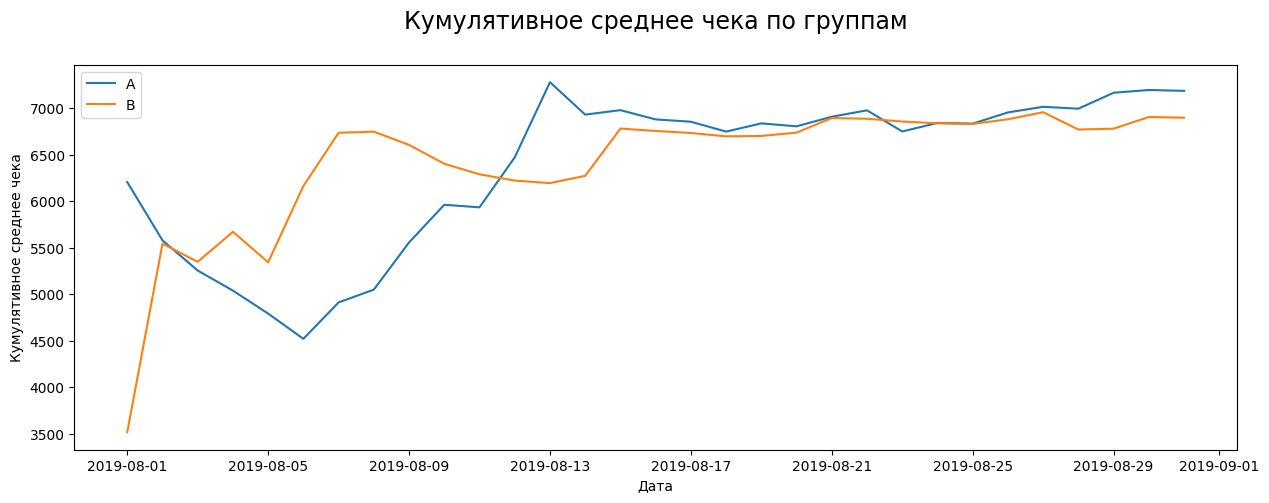

In [55]:
plt.figure(figsize=(15, 5))

# График кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# График кумулятивного среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.xlabel('Дата', fontsize=10)
plt.ylabel('Кумулятивное среднее чека', fontsize=10)
plt.title('Кумулятивное среднее чека по группам' + "\n", fontsize=17)
plt.legend()
plt.show();

В начале теста происходят заметные колебания значения среднего чека, но становится равномерным ближе к концу теста. Кумулятивное среднее чека для группы A установилось незначительно выше группы B, что свидетельствует о более высоком среднем чеке. Но разница не является существенной.

#### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

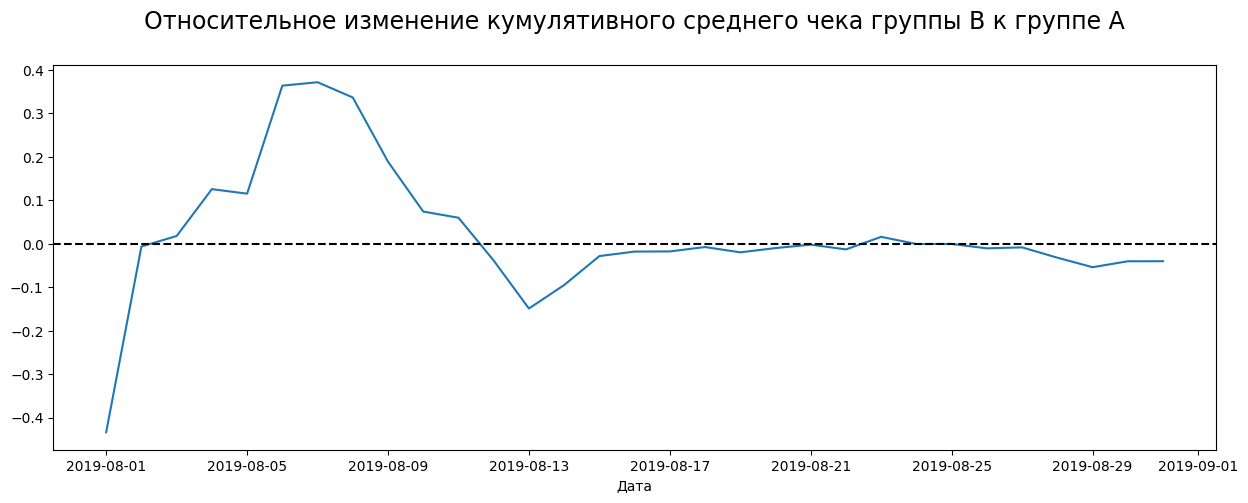

In [56]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))

# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата', fontsize=10)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A' + "\n", fontsize=17)
plt.show();

В первые две недели график показывает неоднозначную тенденцию, возможно это влияние крупных заказов и выбросов. Как и на предыдущием графике в конце срока средний чек по группам практически сравнялся.

#### 4. Построим график кумулятивного среднего количества заказов на посетителя по группам, т.е. график конверсии посетителей в покупатели

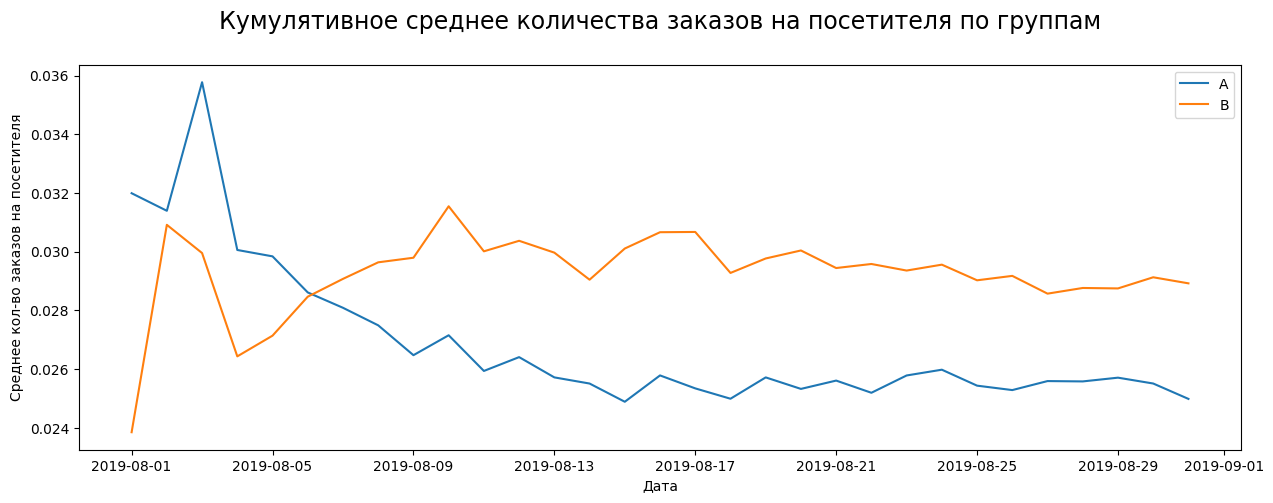

In [57]:
# Считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата', fontsize=10)
plt.ylabel('Среднее кол-во заказов на посетителя', fontsize=10)
plt.title('Кумулятивное среднее количества заказов на посетителя по группам' + "\n", fontsize=17)
plt.legend()
plt.show();

Конверсия в обеих группах колеблется в около 2.7%. В начале месяца конверсия в группе A была выше, чем в группе B. К концу первой недели месяца группа B показала небольшой рост, превысив конверсию группы A. Можно утверждать, что среднее количество заказов на одного посетителя в группе B больше.

#### 5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

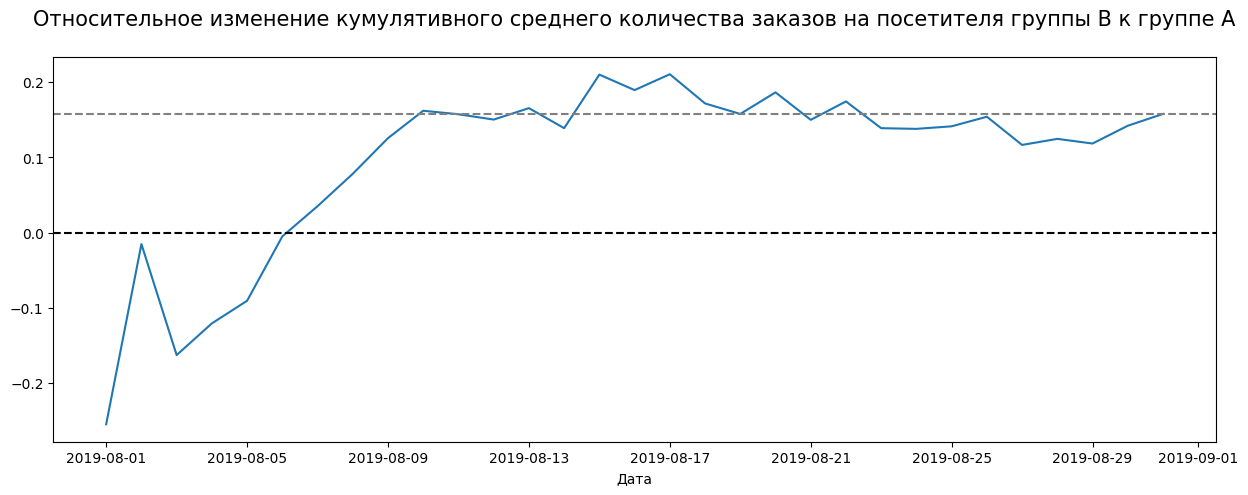

In [58]:
# Собираем данные в одном датафрейме

mergedCumulativeConversions = (cumulativeDataA[['date','conversion']].
                               merge(cumulativeDataB[['date','conversion']], 
                                     left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                                )

plt.figure(figsize=(15, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.158, color='grey', linestyle='--')

plt.xlabel('Дата', fontsize=10)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A' + "\n", fontsize=15)
plt.show();

Относительное изменение кумулятивного среднего количества заказов на одного поьзователя в группе B больше на 15.8%. Для более полного понимания картины построим точечный график количества заказов по пользоватлелям. Возможно, на это влияет определённая доля выбросов.

#### 6. Построим точечный график количества заказов по пользователям

In [59]:
# Анализ количества заказов

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
631,2742574263,3
138,611059232,3
686,2988190573,3
477,2108163459,3
55,249864742,3
889,3908431265,3
907,3967698036,3
323,1404560065,2
157,678354126,2
633,2744017357,2


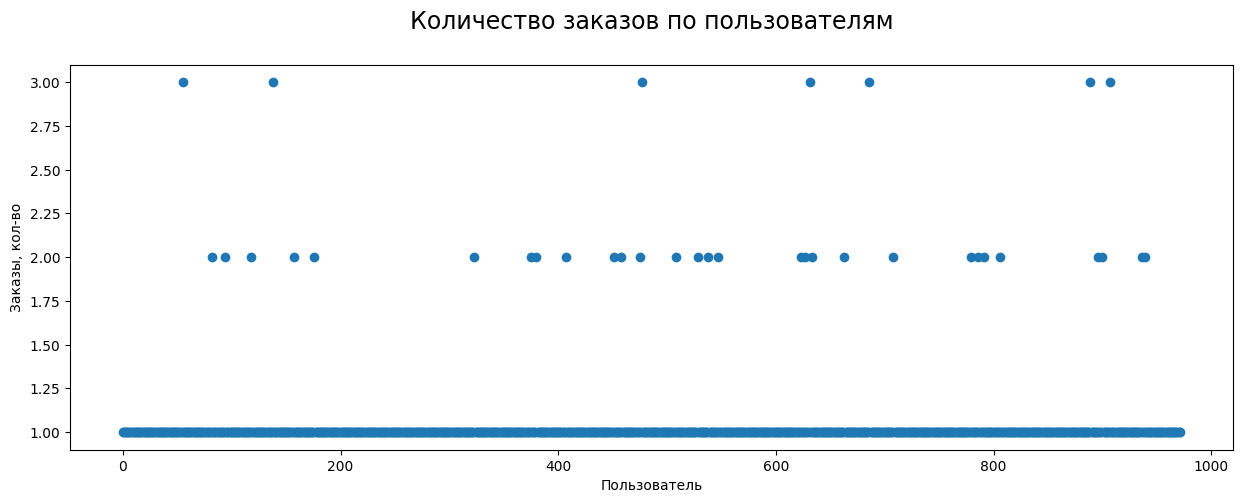

In [60]:
# Точечный график количества заказов на пользователя

plt.figure(figsize=(15, 5))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Пользователь', fontsize=10)
plt.ylabel('Заказы, кол-во', fontsize=10)
plt.title('Количество заказов по пользователям' + "\n", fontsize=17)
plt.show();

Точечный график даёт чёткое представление, что есть определённая доля выбросов, их точное число даст нам более ясную картину. Для этого нам поможет расчёт перцентилей.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [61]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Менее 5% всех заказов состоят из более чем одного заказа. Менее 1% всех заказов состоят из более чем 2-х заказов. Выбросами будем считать более 2 заказа на пользователя.

#### 8. Построим точечный график стоимостей заказов

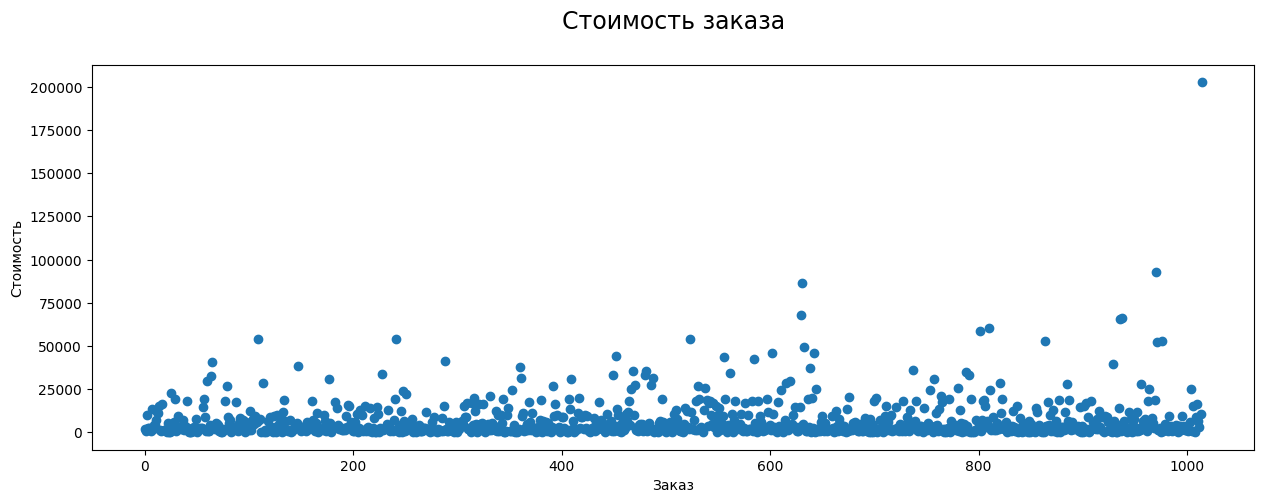

In [62]:
# Точечный график стоимости заказов

plt.figure(figsize=(15, 5))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Заказ', fontsize=10)
plt.ylabel('Стоимость', fontsize=10)
plt.title('Стоимость заказа' + "\n", fontsize=17)
plt.show();

Явно наблюдаются заказы с высокой стоимостью, что естественным образом будут влиять на результат анализа. Рассчитаем какую стоимость заказов составляют 5% и 1% всех заказов.

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов

In [63]:
np.percentile(orders['revenue'], [95, 99])

array([26550.  , 53763.44])

Менее 5% всех заказов стоят дороже 26500 и 1% всех заказов стоит более 53763. Выбросами будем считать заказы со стоимостью более 53763.44.

#### 10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Т.к. значительное число аномальных значений в группах существенно влияют на результат с использованием параметров, для расчёта статистической значимости будем использовать непараметрический критерий Манна-Уитни.

- Сформулируем нулевую гипотезу: "Различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет".  
- Альтернативная гипотеза: "Среднии количеств заказов на посетителя между группами по "сырым" данным отличаются".  
- Уровень статистической значимости примем равным 0,05.

Чтобы рассчитать статистическую значимость различий в среднем количестве заказов, передадим критерию Манна-Уитни данные о заказах по группам.

In [64]:
# Список с количеством заказов для каждого из пользователей группы A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

# Список с количеством заказов для каждого из пользователей группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


# Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group == "A"')['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group == "B"')['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим статистический критерий Манна-Уитни к полученным группам и рассчитаем p-value
pv_rawoders = "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1])

# относительное различие групп A и B
diff_rawoders = "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

print(f'p-value: {pv_rawoders}')
print(f'относительное различие групп A и B: {diff_rawoders}')

p-value: 0.012
относительное различие групп A и B: 0.158


- p-value критерия Манна-Уитни оказался меньше уровня статистической значимости.  
- Нулевая гипотеза о том, что различий в среднем количестве заказов между группами по "сырым" данным нет - не подтвердилась.
- относительный выигрыш группы В составляет 15,8%

Это подкрепляется графиками кумулятивного среднего количества заказов на посетителя по группам. Т.е. по сырым данным мы видим, что количество заказов в группах отличаются.

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

- Сформулируем нулевую гипотезу: "Различий в среднем чеке заказа между группами по 'сырым' данным нет".  
- Альтернативная гипотеза: "Средний чек заказа между группами по 'сырым' данным отличается".  
- Уровень статистической значимости примем равным 0,05.

In [65]:
# Применим статистический критерий Манна-Уитни к полученным группам и рассчитаем p-value
pv_rawcheck = '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

# относительное различие группы A и B
diff_rawcheck = "{0:.3f}".format((orders[orders['group']=='B']['revenue']).mean() / (orders[orders['group']=='A']['revenue']).mean() - 1)


print(f'p-value: {pv_rawcheck}')
print(f'относительное различие групп A и B: {diff_rawcheck}')

p-value: 0.790
относительное различие групп A и B: -0.040


- p-value критерия Манна-Уитни оказался намного больше уровня статистической значимости.  
- Нулевую гипотеза о том, что различий в среднем чеке заказа между группами по 'сырым' данным нет - опровергнуть не удалось.
- относительный выигрыш группы A составляет 4%

Результат по сырым данным показывает, что средний чек заказа в группах не отличается. Это также согласуется с данными из графиков по изменению кумулятивного среднего чека, где небольшая разница практически несущественна.

#### 12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

- Сформулируем нулевую гипотезу: "Различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет".  
- Альтернативная гипотеза: "Среднии количеств заказов на посетителя между группами по "очищенным" данным отличаются".  
- Уровень статистической значимости примем равным 0,05.

Выявим т.н. аномальных пользователей с числом заказов более 2 на пользователя и стоимостью заказа более 53763.44 на пользователя.

In [66]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

f'Пользователей с аномальными данными: {abnormalUsers.shape[0]}'

'Пользователей с аномальными данными: 18'

После отбора пользователей с аномальными данными у нас останется 954 пользователя

Объявим переменные `sampleAFiltered` и `sampleAFiltered`, в которых пользователям из разных групп будет соответствовать количество заказов на основе отфильтрованных данных. Тем, кто ничего не заказал, будут соответствовать нули.

In [67]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group == "A"')['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData.query('group == "B"')['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# применим статистический критерий Манна-Уитни к полученным выборкам и рассчитаем p-value
pv_cl_orders = "{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

# относительное различие группы A и B
diff_cl_orders = "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)

print(f'p-value: {pv_cl_orders}')
print(f'относительное различие групп A и B: {diff_cl_orders}')

p-value: 0.006
относительное различие групп A и B: 0.192


- p-value критерия Манна-Уитни оказался значительно меньше уровня статистической значимости.  
- Нулевая гипотеза о том, что различий в среднем количестве заказов между группами по "очищенным" данным нет - не подтвердилась.
- относительный выигрыш группы В составляет 19,2%, что больше, чем по "сырым данным"

Этот результат согласуется с сырыми данными и подтверждает, что среднее количество заказов в двух группах различаются.

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

- Сформулируем нулевую гипотезу: "Различий в среднем чеке заказа между группами по 'очищенным' данным нет".  
- Альтернативная гипотеза: "Средний чек заказа между группами по 'очищенным' данным отличается".  
- Уровень статистической значимости примем равным 0,05.

In [68]:
# рассчитываем p-value
pv_cl_check = (
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# относительное различие группы A и B
diff_cl_check = (
    "{0:.3f}".format((orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']).mean() / (orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']).mean() - 1)
    

)

print(f'p-value: {pv_cl_check}')
print(f'относительное различие групп A и B: {diff_cl_check}')


p-value: 0.842
относительное различие групп A и B: -0.014


- p-value критерия Манна-Уитни оказался намного больше уровня статистической значимости.  
- Нулевую гипотеза о том, что различий в среднем чеке заказа между группами по 'очищенным' данным нет - опровергнуть не удалось.
- относительный выигрыш группы A составил 1.4%  
Относительная значимость различий в среднем чеке в группе А незначительно превосходит показатель группы В.

#### 14. Принятие решения по результатам теста

Принято решение остановить тест и зафиксировать победу группы В.  
В результате теста длиною в месяц, выручка группы В оказалась существенно больше выручки группы А. Также, анализ показал, что конверсия в B больше, несмотря на то, что средний чек в сырых данных обеих группах был одинаковый. Но после очистки данных мы видим, что кроме остальных метрик средний чек в группе В также немного увеличился. Это говорит, что число заказов, как и выручка с каждого заказа в группе В имеют тенденцию к росту. Статистические тесты на различие основных метрик также не выявили противоречий в исходе анализа.


### Общий вывод


В результате предварительного анализа данных были внесены необходимые коррективы. Названия колонок в таблице с гипотезами были приведены к нижнему регистру, а типы данных в колонках с датами успешно преобразованы в формат datetime. В процессе предобработки, также выявлена аномально высокая цена одного заказа, которая была устранена. Отметим, что в данных не обнаружено пропусков и дубликатов. Девять гипотез, требующих приоритизации, выделены для последующего анализа. Параметры reach, impact и efforts, используемые для расчета приоритета, оцениваются по шкале от 1 до 10, в то время как параметр confidence имеет диапазон оценок от 1 до 9. Для проведения теста пользователи были разделены на две группы: A и B.  Важно отметить, что общее количество уникальных пользователей составляет 972. Дата проведения теста с 2019-08-01 по 2019-08-31. Стоит отметить ещё одну важную особенность поступивших данных. 5.6% пользователей оказалось присутствующими в обеих группах А/В-теста, что недопустимо. Ввиду этого, в целях проведения достоверного анализа мы удалили данных пользователей. Также было выявлено превышение числа пользователей в группе В на 18,4%, что является высоким показателем, т.к. допустимая граница составляет не более 1%. Их удаление не представлялось возможным, поэтому результаты анализа будут искажены.

В первой части исследования мы провели приоритизацию гипотез. Согласно методу ICE, наиболее перспективными оказываются гипотезы с номерами 8, 0, 7 и 6. В этом случае, гипотеза "Запустить акцию, дающую скидку на товар в день рождения" занимает лидирующую позицию, исходя из высоких значений параметров impact, confidence и efforts. Однако, при использовании метода RICE, приоритет изменяется. Самыми перспективными становятся гипотезы с номерами 7, 2, 0 и 6. Здесь основной вклад в приоритизацию вносит параметр reach, который показывает, насколько широкий охват пользователей затронут предлагаемыми изменениями. Таким образом, гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" становится лидером приоритета благодаря максимальному значению параметра reach, равному 10. Этот аспект метода RICE учитывает важность охвата изменений для пользователей и делает данную гипотезу более перспективной по сравнению с другими.

Далее был проведён анализ А/В-теста. Исследование выручки двух групп выявило существенное увеличение показателя для группы В. Также, число заказов в группе B значительно больше. Единственное. что сближает две группы - это средний чек заказа. Это хорошо прослеживается на построенных графиках. Чтобы подтвердить результаты, нам необходимо было избавиться от данных. которые своими высокими показателями могли исказить наши выводы. Таким образом, мы провели дополнительные расчёты между т.н. "сырыми" и "очищенными" данными. Для исключения из расчётов аномальных значений был произведен расчёт перцентилей количества заказов и стоимости заказов. Верхней границей параметров был выбран 99-й перцентиль. Количество заказов мы ограничили 2, а стоимость ограничили 53763.44. В целях подтверждения результатов анализа мы сформулировали ряд гипотез и проверили их с приемлемым уровнем статистической значимости равным 0,05. Получили следующие результаты:
- гипотеза о том, что различий в среднем количестве заказов между группами по "сырым" данным нет - не подтвердилась;
- гипотеза о том, что различий в среднем чеке заказа между группами по 'сырым' данным нет - опровергнуть не удалось;
- гипотеза о том, что различий в среднем количестве заказов между группами по "очищенным" данным нет - не подтвердилась;
- гипотеза о том, что различий в среднем чеке заказа между группами по 'очищенным' данным нет - опровергнуть не удалось.  

По результатам теста принято решение остановить тест и зафиксировать результат в виде увеличения за 1 месяц выручки группы В, а также увеличении конверсии данной группы по сравнению с группой А.